<a href="https://colab.research.google.com/github/CeydaB4lci/DSA210-Project/blob/main/DSA210_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

capacity = pd.read_csv('/content/drive/MyDrive/DSA 210 data/istanbul_dams_capacity.csv')
precipitation_consumption = pd.read_csv('/content/drive/MyDrive/DSA 210 data/istanbul_dams_precipitation_and_daily_consumption.csv')
occupancy = pd.read_csv('/content/drive/MyDrive/DSA 210 data/istanbul-dams-daily-occupancy-rates.csv')
population = pd.read_csv('/content/drive/MyDrive/DSA 210 data/Istanbul_population.csv')

Capacity data

In [2]:
print(f'Rows: {capacity.shape[0]}, Columns: {capacity.shape[1]}')
capacity.head()

Rows: 10, Columns: 2


,Dam Name,Dam Capacity
0,Omerli,235371000
1,Darlik,107500000
2,Elmali,9600000
3,Terkos,162241000
4,Buyuk cekmece,148943000


In [3]:
capacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Dam Name      10 non-null     object
 1   Dam Capacity  10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 292.0+ bytes


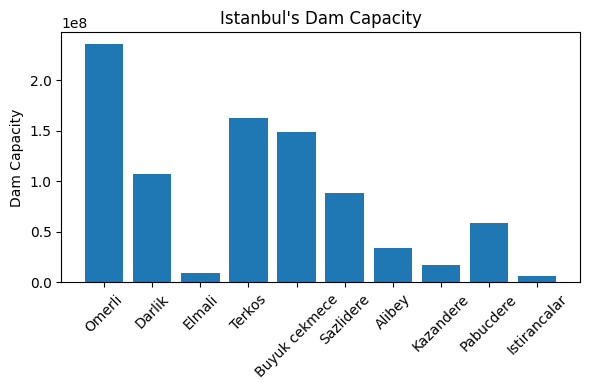

In [4]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(capacity['Dam Name'], capacity['Dam Capacity'])
ax.set_ylabel('Dam Capacity')
ax.set_title("Istanbul's Dam Capacity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Precipitation_consumption data

In [5]:
print(f'Rows: {precipitation_consumption.shape[0]}, Columns: {precipitation_consumption.shape[1]}')
precipitation_consumption.head()

Rows: 4797, Columns: 12


,Date,Omerli,Darlik,Elmali,Terkos,Buyuk cekmece,Sazlidere,Alibey,Kazandere,Pabucdere,Istirancalar,Daily Consumption
0,1.01.2011,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2096199
1,2.01.2011,0.00,0.00,0.00,0.42,1.37,0.87,0.20,2.26,1.89,1.39,2214668
2,3.01.2011,8.08,10.01,11.64,18.82,9.64,14.72,13.50,8.20,10.37,16.47,2092441
3,4.01.2011,2.78,8.48,7.09,3.42,0.83,4.31,4.30,1.44,1.60,3.99,2096199
4,5.01.2011,0.00,0.78,0.00,0.42,0.00,0.00,0.56,1.15,1.11,0.80,2214668


In [6]:
precipitation_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4797 entries, 0 to 4796
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               4797 non-null   object 
 1   Omerli             4797 non-null   float64
 2   Darlik             4797 non-null   float64
 3   Elmali             4797 non-null   float64
 4   Terkos             4797 non-null   float64
 5   Buyuk cekmece      4797 non-null   float64
 6   Sazlidere          4797 non-null   float64
 7   Alibey             4797 non-null   float64
 8   Kazandere          4797 non-null   float64
 9   Pabucdere          4797 non-null   float64
 10  Istirancalar       4797 non-null   float64
 11  Daily Consumption  4797 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 449.8+ KB


In [7]:
# change date to datetime format
precipitation_consumption['Date'] = pd.to_datetime(precipitation_consumption['Date'], dayfirst=True)

In [8]:
# make date index
precipitation_consumption = precipitation_consumption.set_index('Date')

In [9]:
# control missing dates
full_range = precipitation_consumption.asfreq('D')
missing_dates = full_range[full_range.isna().any(axis=1)]
missing_dates

,Omerli,Darlik,Elmali,Terkos,Buyuk cekmece,Sazlidere,Alibey,Kazandere,Pabucdere,Istirancalar,Daily Consumption
Date,,,,,,,,,,,


In [10]:
# monthly sum for consumption and average for precipitation

aggregation_rules = {
  'Daily Consumption': 'sum'
}

dam_cols_precipitation = [col for col in precipitation_consumption.columns if col not in ['Date', 'Daily Consumption']]

for col in dam_cols_precipitation:
  aggregation_rules[col] = 'mean'

monthly_data = precipitation_consumption.resample('ME').agg(aggregation_rules)
monthly_data = monthly_data['2011-01-01':'2023-12-31']

display(monthly_data.head())

,Daily Consumption,Omerli,Darlik,Elmali,Terkos,Buyuk cekmece,Sazlidere,Alibey,Kazandere,Pabucdere,Istirancalar
Date,,,,,,,,,,,
2011-01-31,65428301,1.608710,2.039032,2.023226,3.402903,1.627097,1.878065,2.018387,2.194194,2.862258,3.594839
2011-02-28,59158616,0.826786,0.548214,1.113214,1.791786,0.796429,1.015357,1.491071,2.874286,3.165000,4.061786
2011-03-31,65895328,1.450645,1.703871,0.876452,1.239032,0.584194,1.197419,1.282581,2.026774,1.924839,2.194839
2011-04-30,63178959,2.107667,2.471667,2.254667,3.325000,2.561667,3.029667,2.995667,3.975333,4.495667,4.190000
2011-05-31,69282717,0.449677,0.544194,0.769355,0.596129,0.478710,0.706129,0.762903,1.440323,1.426774,1.561613


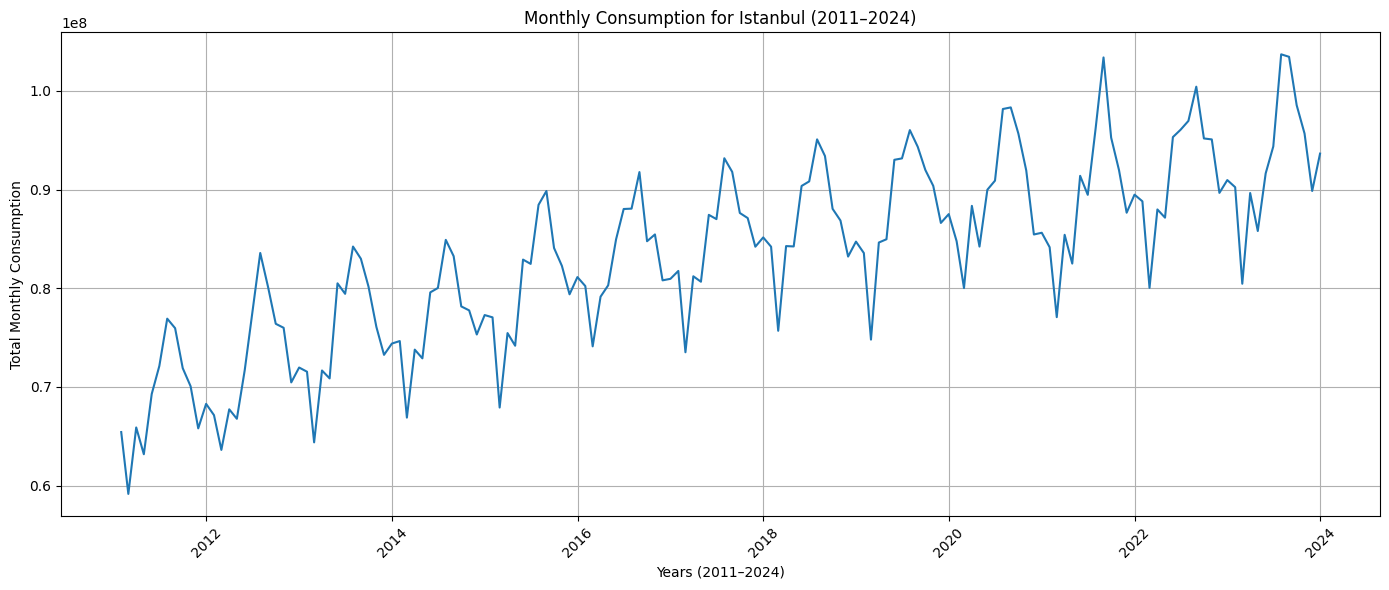

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['Daily Consumption'], label=col)
plt.xlabel('Years (2011–2024)')
plt.ylabel('Total Monthly Consumption')
plt.title('Monthly Consumption for Istanbul (2011–2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

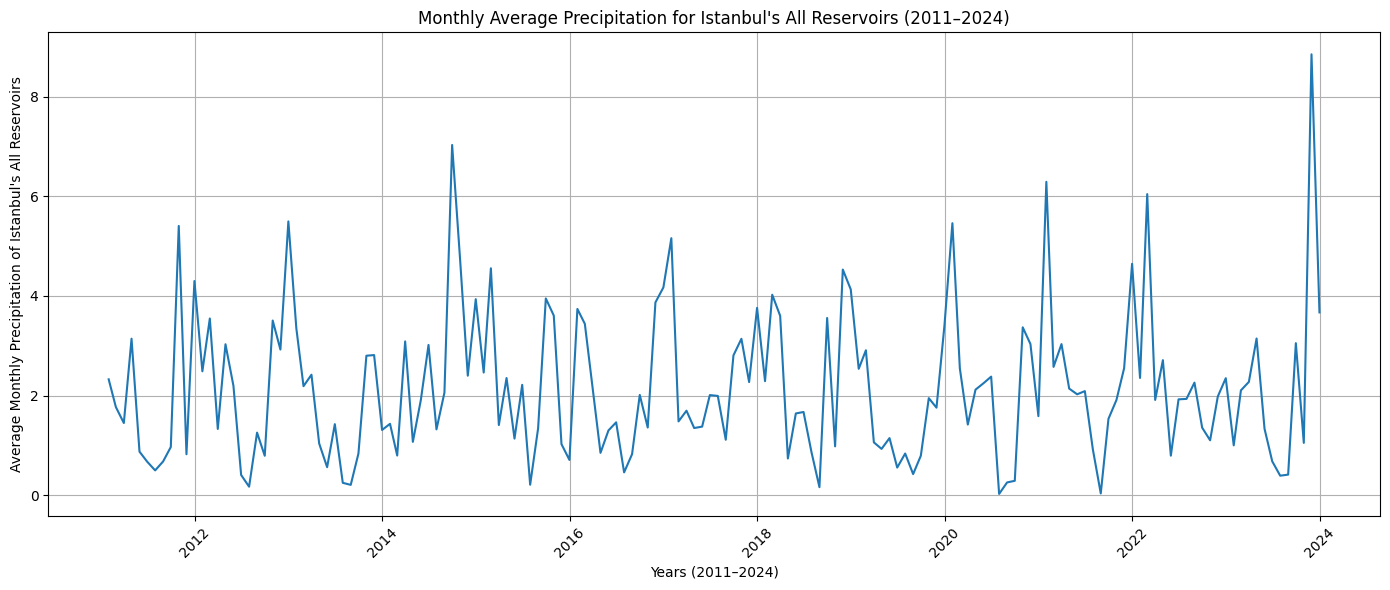

In [12]:
plt.figure(figsize=(14, 6))
monthly_avg_precipitation = monthly_data[dam_cols_precipitation].mean(axis=1)

plt.plot(monthly_data.index, monthly_avg_precipitation)
plt.xlabel('Years (2011–2024)')
plt.ylabel("Average Monthly Precipitation of Istanbul's All Reservoirs")
plt.title("Monthly Average Precipitation for Istanbul's All Reservoirs (2011–2024)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Occupancy data

In [13]:
print(f'Rows: {occupancy.shape[0]}, Columns: {occupancy.shape[1]}')
occupancy.head()

Rows: 8520, Columns: 11


,Date,Omerli,Darlik,Elmali,Terkos,Alibey,Buyuk cekmece,Sazlıdere,Kazandere,Papuc dere,Istirancalar
0,23.10.2000,65.26%,75.02%,78.98%,70.86%,0.00%,52.14%,50.55%,5.75%,6.86%,11.10%
1,24.10.2000,65.97%,77.30%,81.72%,71.03%,0.00%,52.14%,50.70%,5.75%,6.91%,7.72%
2,25.10.2000,66.33%,78.79%,82.67%,70.86%,0.00%,51.97%,50.70%,5.75%,6.94%,10.56%
3,26.10.2000,66.26%,79.33%,82.81%,70.68%,0.00%,51.79%,50.70%,5.75%,6.96%,11.42%
4,27.10.2000,66.05%,79.59%,82.81%,70.68%,0.00%,51.61%,50.55%,5.75%,6.67%,11.40%


In [14]:
occupancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8520 entries, 0 to 8519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           8520 non-null   object
 1   Omerli         8520 non-null   object
 2   Darlik         8520 non-null   object
 3   Elmali         8520 non-null   object
 4   Terkos         8520 non-null   object
 5   Alibey         8520 non-null   object
 6   Buyuk cekmece  8520 non-null   object
 7   Sazlıdere      8520 non-null   object
 8   Kazandere      8520 non-null   object
 9   Papuc dere     8520 non-null   object
 10  Istirancalar   8520 non-null   object
dtypes: object(11)
memory usage: 732.3+ KB


In [15]:
# change date to datetime format
occupancy['Date'] = pd.to_datetime(occupancy['Date'], dayfirst=True)

In [16]:
# make date index
occupancy = occupancy.set_index('Date')

In [17]:
# control missing dates
full_range = occupancy.asfreq('D')
missing_dates = full_range[full_range.isna().any(axis=1)]
missing_dates

,Omerli,Darlik,Elmali,Terkos,Alibey,Buyuk cekmece,Sazlıdere,Kazandere,Papuc dere,Istirancalar
Date,,,,,,,,,,


In [18]:
# make object float
cols = ['Omerli','Darlik','Elmali','Terkos','Alibey',
        'Buyuk cekmece','Sazlıdere','Kazandere','Papuc dere','Istirancalar']

for col in cols:
    occupancy[col] = occupancy[col].str.replace('%', '')
    occupancy[col] = pd.to_numeric(occupancy[col])

occupancy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8520 entries, 2000-10-23 to 2024-02-19
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Omerli         8520 non-null   float64
 1   Darlik         8520 non-null   float64
 2   Elmali         8520 non-null   float64
 3   Terkos         8520 non-null   float64
 4   Alibey         8520 non-null   float64
 5   Buyuk cekmece  8520 non-null   float64
 6   Sazlıdere      8520 non-null   float64
 7   Kazandere      8520 non-null   float64
 8   Papuc dere     8520 non-null   float64
 9   Istirancalar   8520 non-null   float64
dtypes: float64(10)
memory usage: 732.2 KB


In [19]:
# monthly average
monthly_occupancy = occupancy.resample('ME').mean()

In [20]:
# find wrong rates
for c in cols:
    idx = monthly_occupancy[c].idxmax()
    print(c, monthly_occupancy[c].max(), '→', idx)
date = idx   # yukarıdan dönen tarih
occupancy.loc[date.replace(day=1):date, c]

Omerli 7888.645161290323 → 2023-05-31 00:00:00
Darlik 6492.387096774193 → 2023-05-31 00:00:00
Elmali 4480.709677419355 → 2023-05-31 00:00:00
Terkos 4075.451612903226 → 2023-05-31 00:00:00
Alibey 2584.0666666666666 → 2023-06-30 00:00:00
Buyuk cekmece 3399.8709677419356 → 2023-05-31 00:00:00
Sazlıdere 3314.451612903226 → 2023-05-31 00:00:00
Kazandere 1758.967741935484 → 2023-05-31 00:00:00
Papuc dere 1338.5806451612902 → 2023-05-31 00:00:00
Istirancalar 3864.0333333333333 → 2023-04-30 00:00:00


,Istirancalar
Date,
2023-04-01,3997.0
2023-04-02,3939.0
2023-04-03,3802.0
2023-04-04,3809.0
2023-04-05,3666.0
2023-04-06,3583.0
2023-04-07,3362.0
2023-04-08,3187.0
2023-04-09,3002.0


In [21]:
# make wrong rates correct
mask = (occupancy.index >= '2023-04-01') & (occupancy.index <= '2023-08-08')
occupancy.loc[mask, cols] = occupancy.loc[mask, cols] / 100

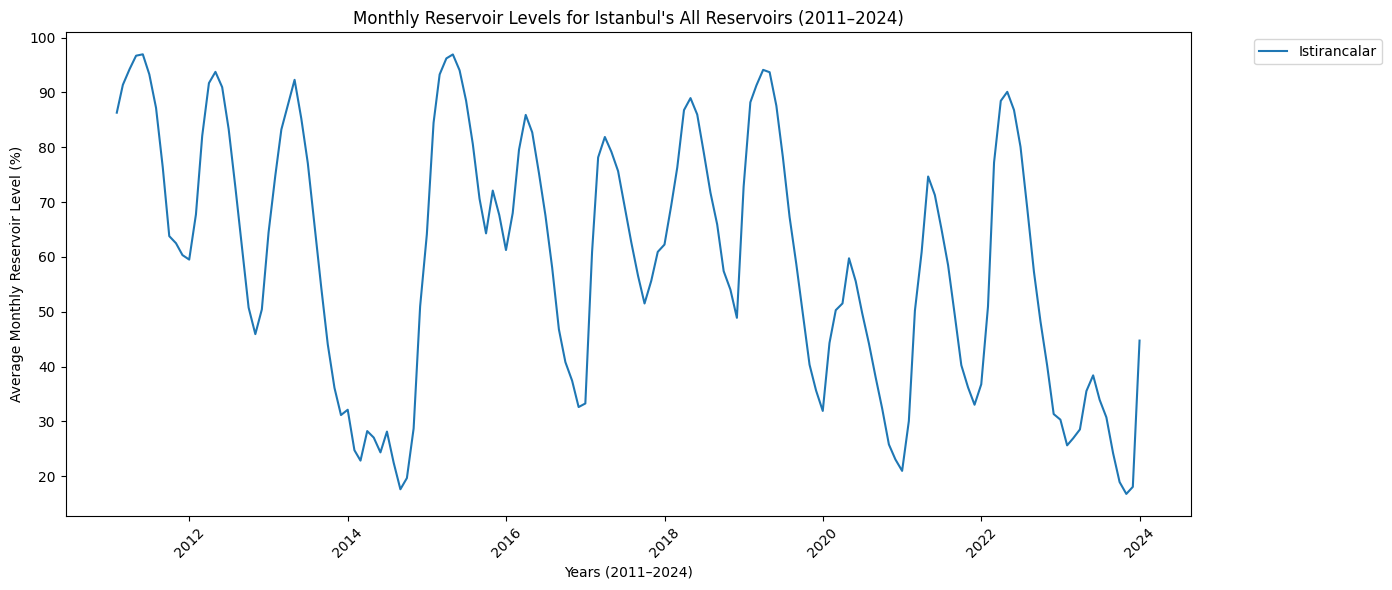

In [22]:
plt.figure(figsize=(14, 6))
monthly_occupancy = occupancy.resample('ME').mean()
monthly_occupancy = monthly_occupancy['2011-01-01':'2023-12-31']
all_cols_average = monthly_occupancy.mean(axis=1)

plt.plot(monthly_occupancy.index, all_cols_average, label=col)

plt.xlabel("Years (2011–2024)")
plt.ylabel("Average Monthly Reservoir Level (%)")
plt.title(f"Monthly Reservoir Levels for Istanbul's All Reservoirs (2011–2024)")

plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Population data

In [23]:
print(f'Rows: {population.shape[0]}, Columns: {population.shape[1]}')
population.head()

Rows: 14, Columns: 2


,year,population
0,2011,"13,624,240"
1,2012,"13,854,740"
2,2013,"14,160,467"
3,2014,"14,377,018"
4,2015,"14,657,434"


In [24]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        14 non-null     int64 
 1   population  14 non-null     object
dtypes: int64(1), object(1)
memory usage: 356.0+ bytes


In [25]:
# change year to datetime format
population['year'] = pd.to_datetime(population['year'], format='%Y')

In [26]:
# make year index
population = population.set_index('year')

In [27]:
# make population integer
population['population'] = population['population'].astype(str).str.replace(',', '')
population['population'] = pd.to_numeric(population['population'])

population.info()
population.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2011-01-01 to 2024-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   population  14 non-null     int64
dtypes: int64(1)
memory usage: 224.0 bytes


,population
year,
2011-01-01,13624240
2012-01-01,13854740
2013-01-01,14160467
2014-01-01,14377018
2015-01-01,14657434


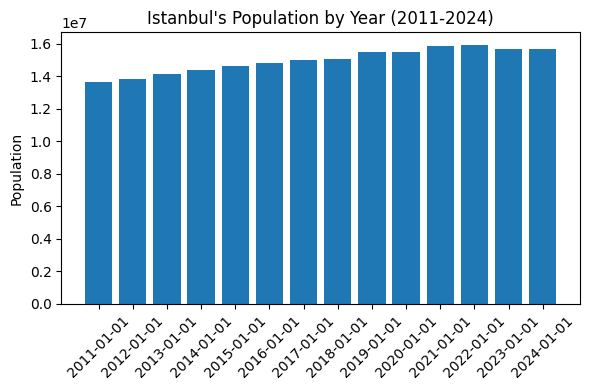

In [28]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(population.index.astype(str), population['population'])
ax.set_ylabel('Population')
ax.set_title("Istanbul's Population by Year (2011-2024)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
monthly_population = population['population'].resample('ME').ffill()
monthly_population = monthly_population.loc['2011-01-01':'2023-12-31']

print("First 5 rows of monthly_population:")
print(monthly_population.head())
print("\nLast 5 rows of monthly_population:")
print(monthly_population.tail())

First 5 rows of monthly_population:
year
2011-01-31    13624240
2011-02-28    13624240
2011-03-31    13624240
2011-04-30    13624240
2011-05-31    13624240
Freq: ME, Name: population, dtype: int64

Last 5 rows of monthly_population:
year
2023-08-31    15655924
2023-09-30    15655924
2023-10-31    15655924
2023-11-30    15655924
2023-12-31    15655924
Freq: ME, Name: population, dtype: int64


Hypothesis Testing

In [30]:
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [31]:
# H1: Rainfall -> Reservoir
monthly_avg_precipitation_series = monthly_data[dam_cols_precipitation].mean(axis=1)

corr1_p, p_value1_p = pearsonr(monthly_avg_precipitation_series, all_cols_average)
print("Correlation:", corr1_p, "p-value:", p_value1_p)

corr1_s, p_value1_s = spearmanr(monthly_avg_precipitation_series, all_cols_average)
print("Correlation:", corr1_s, "p-value:", p_value1_s)

Correlation: -0.1582160757617884 p-value: 0.04853336063865864
Correlation: -0.10414565914874112 p-value: 0.19572114050651437


In [32]:
# H2: Water Consumption -> Reservoir
corr2_p, p_value2_p = pearsonr(monthly_data['Daily Consumption'], all_cols_average)
print("Correlation:", corr2_p, "p-value:", p_value2_p)

corr2_s, p_value2_s = spearmanr(monthly_data['Daily Consumption'], all_cols_average)
print("Correlation:", corr2_s, "p-value:", p_value2_s)

Correlation: -0.35184896441753166 p-value: 6.664739363563848e-06
Correlation: -0.3390969006337817 p-value: 1.4893371734272353e-05


In [33]:
# H3: Population -> Water Consumption
corr3_p, p_value3_p = pearsonr(monthly_population, monthly_data['Daily Consumption'])
print("Correlation:", corr3_p, "p-value:", p_value3_p)

corr3_s, p_value3_s = spearmanr(monthly_population, monthly_data['Daily Consumption'])
print("Correlation:", corr3_s, "p-value:", p_value3_s)

Correlation: 0.7875936931597385 p-value: 3.3579450751809635e-34
Correlation: 0.7795979325899838 p-value: 4.132541096718202e-33


In [34]:
table = pd.DataFrame({
    "Hypothesis": ["H1", "H2", "H3"],
    "Variables": [
        "Rainfall → Reservoir",
        "Consumption → Reservoir",
        "Population → Consumption"
    ],
    "Spearman ρ": [corr1_s, corr2_s, corr3_s],
    "p-value": [p_value1_s, p_value2_s, p_value3_s]
})

print(table)

  Hypothesis                 Variables  Spearman ρ       p-value
0         H1      Rainfall → Reservoir   -0.104146  1.957211e-01
1         H2   Consumption → Reservoir   -0.339097  1.489337e-05
2         H3  Population → Consumption    0.779598  4.132541e-33


In [35]:
# H4: Rainfall + Water Consumption -> Sustainibility
#Sustainibility: Long term reservoir 2001-2024
monthly_occupancy_2001 = occupancy.resample('ME').mean()
monthly_occupancy_2001 = monthly_occupancy_2001['2001-01-01':'2023-12-31']
occupancy_avg = monthly_occupancy.mean(axis=1)

Y = occupancy_avg

X = pd.concat([
    monthly_avg_precipitation_series,
    monthly_data['Daily Consumption']
], axis=1)

X.columns = ['Rainfall', 'Consumption']

X = sm.add_constant(X)

model_H4 = sm.OLS(Y, X, missing='drop').fit()

print(model_H4.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     17.43
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           1.51e-07
Time:                        14:12:59   Log-Likelihood:                -695.00
No. Observations:                 156   AIC:                             1396.
Df Residuals:                     153   BIC:                             1405.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         153.6537     16.445      9.344      